In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


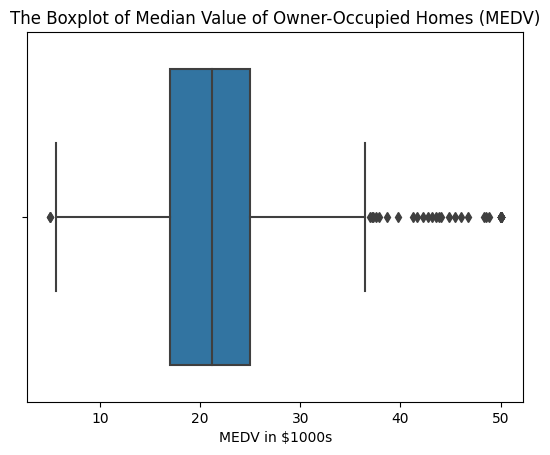

In [4]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.title('The Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV in $1000s')
plt.show()

**Conclusion:** The boxplot shows there are a lots of outliers in the dependent variable. However, at first it is not meaningful to ignore them as long as it does not sound and make any sense.

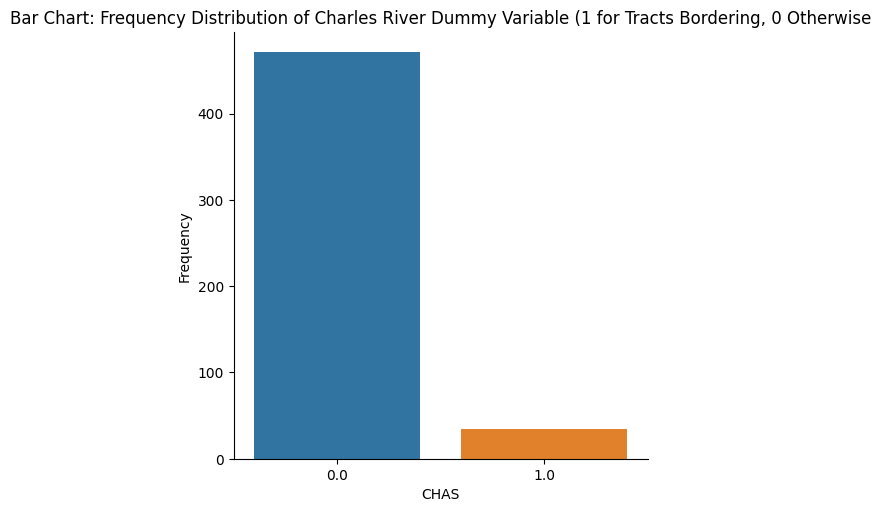

In [5]:
ax = sns.catplot(x='CHAS',kind='count', data=boston_df)
plt.title('Bar Chart: Frequency Distribution of Charles River Dummy Variable (1 for Tracts Bordering, 0 Otherwise')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

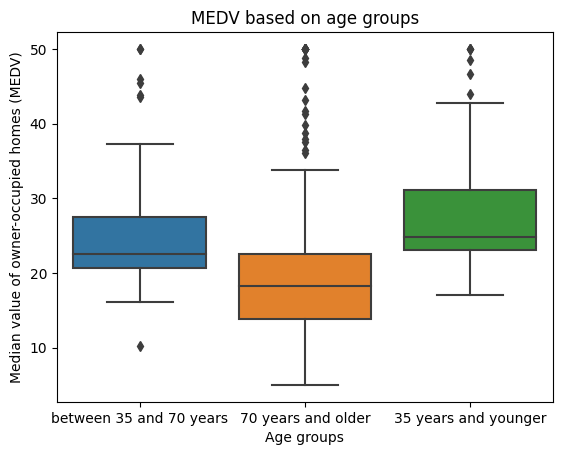

In [7]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('MEDV based on age groups')
plt.xlabel('Age groups')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

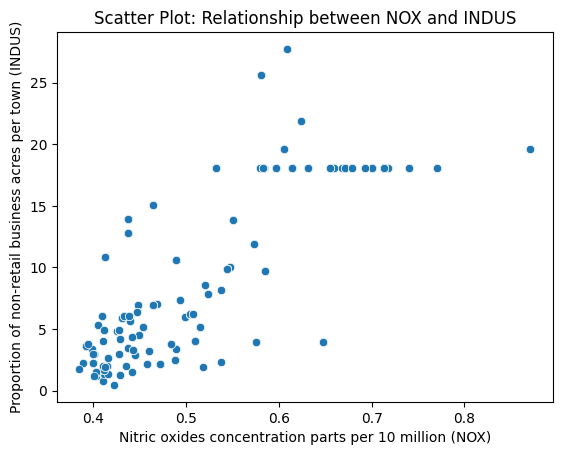

In [8]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot: Relationship between NOX and INDUS')
plt.xlabel('Nitric oxides concentration parts per 10 million (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show()

In [9]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion:** As we can see, the scatterplot demonstrates a positive linear correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS), with the correlation being strongest in the lower left portion of the plot. However, an intriguing observation is that NOX levels continue to rise even as INDUS values plateau around 18, suggesting that the existing INDUS levels are sufficient to drive further NOX increments. This observation indicates that the relationship between NOX and INDUS extends beyond a simple linear correlation. While the results may suggest a bit more than a moderate correlation, the persistence of NOX increases despite INDUS plateauing suggests a stronger, non-linear relationship even causation between these variables.

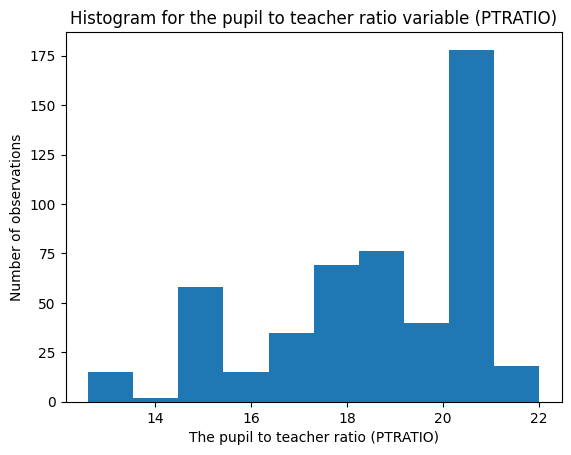

In [10]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('The pupil to teacher ratio (PTRATIO)')
plt.ylabel('Number of observations')
plt.title("Histogram for the pupil to teacher ratio variable (PTRATIO)")
plt.show()

**Conclusion:** The pupil to teacher ratio (PTRATIO) variable is left-skewed, that indicates in this variable the order of central tendencies is as follows: **mean < median < mode**

Throughout the dataset, the most frequently observed ratio centers around 20.5.

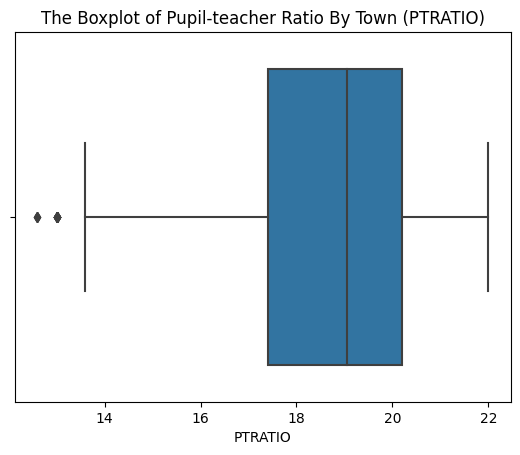

In [11]:
ax = sns.boxplot(x='PTRATIO', data=boston_df)
plt.title('The Boxplot of Pupil-teacher Ratio By Town (PTRATIO)')
plt.xlabel('PTRATIO')
plt.show()

**Conclusion:** The histogram and boxplot right above suggest that PTRATIO is a left-skewed variable in the data set.

# T-test: Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not.")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not.")

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [13]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median') # since the data is skewed, we use median as center and it is greater than alpha value 0.05,
                                                                                                                          # we accept null hypothesis which suggests equality of variances between groups

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True) # since p-value is less than alpha value 0.05, we reject the null hypothesis,
                                                                                                                            # which suggests there is no statistically significant difference
                                                                                                                            # between in median value of houses bounded by the Charles river or not, thus there is a difference

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** since p-value is less than alpha value 0.05, we reject the null hypothesis, which suggests there is no statistically significant difference between in median value of houses bounded by the Charles river or not, thus there is a difference.

# ANOVA: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")

In [15]:
less_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
greater_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [16]:
scipy.stats.levene(less_35, between_35_70, greater_70, center='mean') # since p-value is greater than alpha value 0.05, equality of variances can be assumed among groups

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [17]:
scipy.stats.f_oneway(less_35, between_35_70, greater_70) # since p-value is less than alpha value 0.05, we reject null hypothesis which suggests there is no statistically significant difference, but indeed it is there

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Since p-value is less than alpha value 0.05, we reject null hypothesis which suggests there is no statistically significant difference, but indeed it is there

# Pearson Correlation: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) # As the p-value is less than our significance level 0.05 'alpha value', we reject null hypothesis that means ther is no correlation between NOX and INDUS
                                                           # This has ensured our finding and interpretation in scatter plot above, thus there is a correlation between these variables

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion:** As the p-value is less than our significance level 0.05 'alpha value', we reject null hypothesis that means ther is no correlation between NOX and INDUS. This has ensured our finding and interpretation in scatter plot above, thus there is a correlation between these variables.

# Regression Analysis in Place of Correlation: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("Weighted distance to the five Boston employment centres (DIS) has no impact on the median value of owner occupied homes (MEDV).")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Weighted distance to the five Boston employment centres (DIS) has an impact on the median value of owner occupied homes (MEDV).")

In [ ]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        23:28:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**  By last regression analysis results, p-value is less than 0.05 alpha value that means we can reject null hypothesis, which means there is no any correlation between DIS and MEDV. While there is a correlation. Based on results, the correlation is not that strong but positive around 0.249 as coefficient value is 1.0916 This means that for every unit increase in weighted distance, the median housing value increases by approximately 1,091 because median value variable has been provided in $1000. This mostly suggests distance is not a significant consideration on specifying values of owner-occupied houses, this might be due to other factors influencing home values, or an inaccurate reflection of employment centers' relative importance in the weighted distance measure. A more detailed examination, including comprehensive data on these distance is needed for a more nuanced understanding.

Finally this relationship can be expressed mathematically as follows:

**y = 18.39 + 1.0916x**
